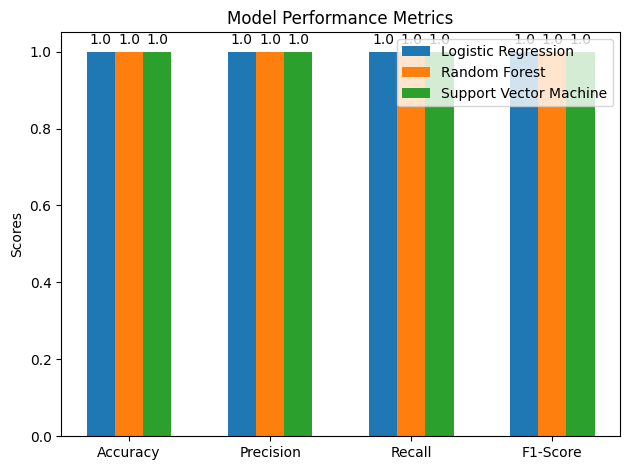

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataframe and split into training and testing sets
def load_dataframe(csv_path):
    df = pd.read_csv(csv_path)
    y = df["label"]
    X = df.drop(["label"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    return X_train, X_test, y_train, y_test

# Train Logistic Regression model
def train_logistic_regression(X_train, y_train):
    lor = LogisticRegression(max_iter=5000)
    lor.fit(X_train, y_train)
    return lor

# Train Random Forest model
def train_random_forest(X_train, y_train):
    rf = RandomForestClassifier(n_estimators=100, random_state=5)
    rf.fit(X_train, y_train)
    return rf

# Train Support Vector Machine (SVM) model
def train_svm(X_train, y_train):
    svm = SVC(kernel='linear', probability=True)
    svm.fit(X_train, y_train)
    return svm

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Main execution
csv_path = 'Crop_recommendation.csv'  # Ensure this file path is correct
X_train, X_test, y_train, y_test = load_dataframe(csv_path)

# Train and evaluate Logistic Regression
lor = train_logistic_regression(X_train, y_train)
lor_accuracy, lor_precision, lor_recall, lor_f1 = evaluate_model(lor, X_test, y_test)

# Train and evaluate Random Forest
rf = train_random_forest(X_train, y_train)
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf, X_test, y_test)

# Train and evaluate SVM
svm = train_svm(X_train, y_train)
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm, X_test, y_test)

# Create bar graph
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lor_metrics = [lor_accuracy, lor_precision, lor_recall, lor_f1]
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]
svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1]

x = np.arange(len(labels))
width = 0.2  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, lor_metrics, width, label='Logistic Regression')
rects2 = ax.bar(x, rf_metrics, width, label='Random Forest')
rects3 = ax.bar(x + width, svm_metrics, width, label='Support Vector Machine')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()
